# 3.0 - Answering Questions

In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [20]:
df = pd.read_csv('../Data/processed/data_processed.csv')
df.head()

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Topics,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24 17:49:19+00:00,2023-09-21 11:32:33+00:00,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,"['careers', 'certification', 'community', 'cur...",True,True,True,False,True,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11 06:50:37+00:00,2023-09-21 11:09:25+00:00,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,"['books', 'education', 'hacktoberfest', 'list'...",True,False,True,False,True,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11 13:42:37+00:00,2023-09-21 11:18:22+00:00,NaN,1441,269997,26485,61,...,"['awesome', 'awesome-list', 'lists', 'resource...",True,False,True,False,True,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26 07:31:14+00:00,2023-09-21 08:09:01+00:00,https://996.icu,187799,267901,21497,16712,...,[],False,False,True,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06 02:34:12+00:00,2023-09-21 10:54:48+00:00,NaN,20998,265161,69434,56,...,"['algorithm', 'algorithms', 'coding-interview'...",True,False,True,False,False,False,False,False,main


Does age of a repository affect its popularity?
Does a repository get more stars/forks if it implements multiple services (Issues, Projects, Downloads, Wiki, Pages, Discussions)?
Are git repositories more popular if they have a homepage?


## Q: Does age of a repository affect its popularity?
- **This question will help** determine if new repositories can have a fair chance of earning stars or not.
- **We'll examine this question by**
    - Calculating the age of all repositories (in days).
    - Plotting age against the number of forks and stars of a repository.
    - Calculate and draw the correlation heatmap.

### Calculate age

In [21]:
df['Created At'] = pd.to_datetime(df['Created At'])

In [22]:
age = pd.Timestamp.now().date() - df['Created At'].dt.date
age = pd.to_timedelta(age,unit='d')
age = age.dt.days
age

0         3274
1         3713
2         3440
3         1721
4         2744
          ... 
215024    4936
215025    3311
215026    3416
215027    3787
215028    2639
Name: Created At, Length: 215029, dtype: int64

In [23]:
df['Age_(days)'] = age

### Plotting age against Stars and Forks

[Text(0.5, 1.0, 'Age - Forks relationship'),
 Text(0, 0.5, 'Forks'),
 Text(0.5, 0, 'Age (days)')]

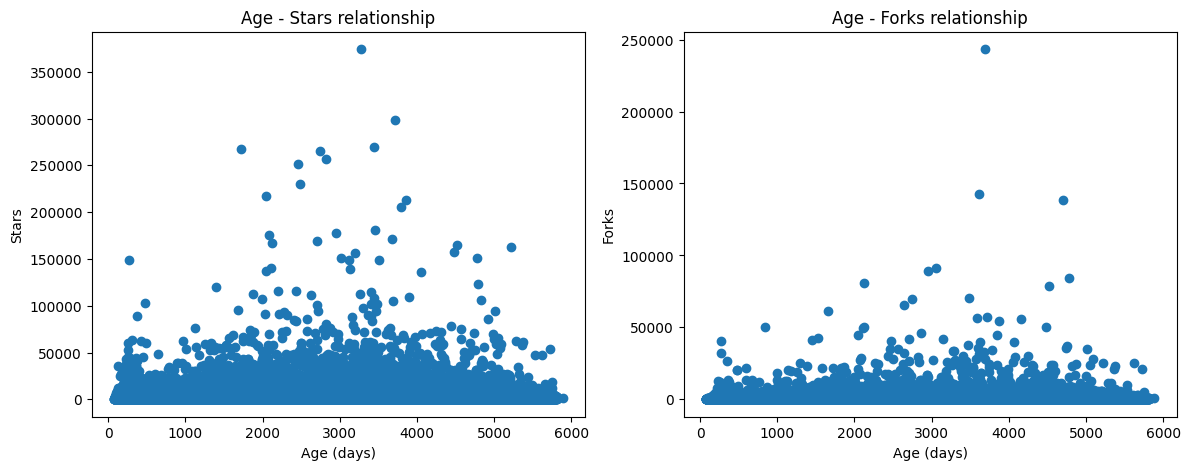

In [24]:
fig = plt.figure(figsize=(14,5))
axs = fig.subplots(1,2).flatten()

axs[0].scatter(y=df['Stars'], x=df['Age_(days)'])
axs[0].set(title='Age - Stars relationship', ylabel='Stars', xlabel='Age (days)')

axs[1].scatter(y=df['Forks'], x=df['Age_(days)'])
axs[1].set(title='Age - Forks relationship', ylabel='Forks', xlabel='Age (days)')

We see that there is a very even distribution across all age values.

### Correlation heatmap

In [25]:
corr_matrix = np.corrcoef(df['Age_(days)'], [df['Stars'], df['Forks']])

Text(0.5, 1.0, 'Correlation matrix between age and stars/forks')

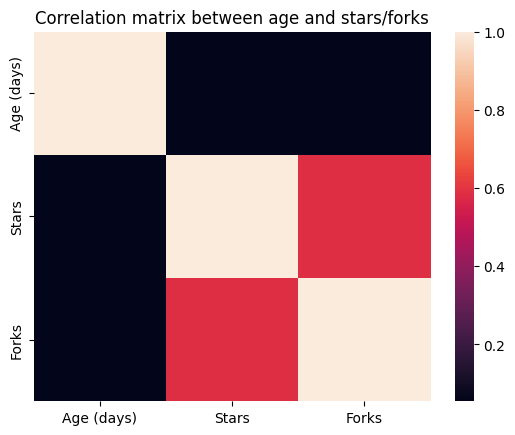

In [26]:
cols = ['Age (days)','Stars','Forks']
sns.heatmap(corr_matrix, xticklabels=cols, yticklabels=cols)
plt.title('Correlation matrix between age and stars/forks')

**Conclusion**
- So, there is virtually **no correlation** between age of a repository and its popularity.
- This means any repository can have fair chance of being popular, despite their age.

## Q: Does a repository get more stars/forks if it implements multiple services (Issues, Projects, Downloads, Wiki, Pages, Discussions)?
- This question will show us whether a repository should implement services or not.
- To answer this question, we will 
    - Calculate the number of services a repository implements.
    - Plotting multiple box plots for each `n_services` to view its distributions.
    - Calculate **Spearman Rank Correlation coefficient** between `n_services` and number of stars/forks.

### Calculate `n_services`

In [27]:
cols = ['Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki',
       'Has Pages', 'Has Discussions']

n_services = df[cols].sum(axis=1)
n_services

0         4
1         3
2         3
3         1
4         2
         ..
215024    3
215025    4
215026    4
215027    4
215028    4
Length: 215029, dtype: int64

In [28]:
df['Service_Count'] = n_services

### Boxplots
- Because the distribution of stars and forks are very **skewed** (see diagram below), it's very hard to view its distribution on a plot.
- So, we'll perform **log-scaling** on the data before plotting.

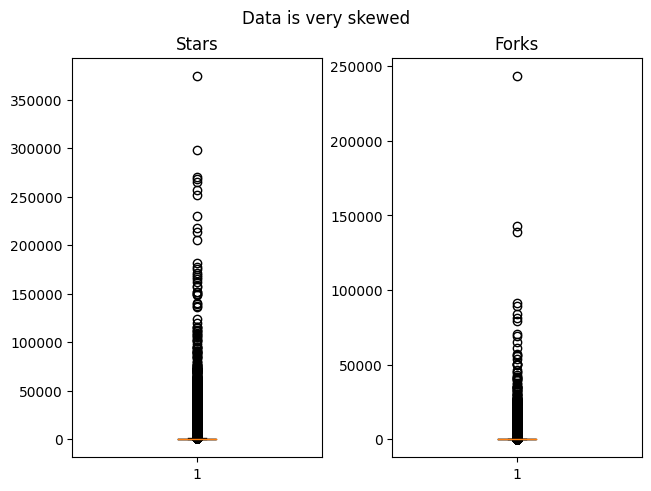

In [29]:
fig = plt.figure(layout='constrained')
fig.suptitle('Data is very skewed')
axs = fig.subplots(1,2).flatten()
axs[0].boxplot(df['Stars'])
axs[0].set(title='Stars')
axs[1].boxplot(df['Forks'])
axs[1].set(title='Forks')
plt.show()

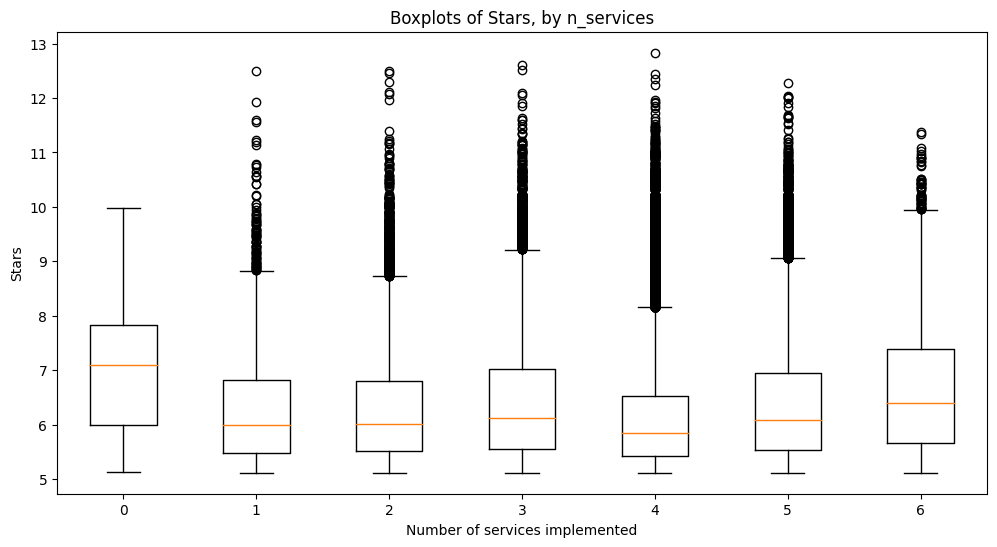

In [30]:
a = []
for i in range(7):
    a.append(np.log(df[df['Service_Count'] == i]['Stars'].to_numpy()))

plt.figure(figsize=(12,6))
plt.boxplot(a, labels=[0,1,2,3,4,5,6])
plt.xlabel('Number of services implemented')
plt.ylabel('Stars')
plt.title('Boxplots of Stars, by n_services')
plt.show()

C:\Users\khoan\AppData\Local\Temp\ipykernel_6544\581791317.py:3: RuntimeWarning: divide by zero encountered in log
  a.append(np.log(df[df['Service_Count'] == i]['Forks'].to_numpy()))


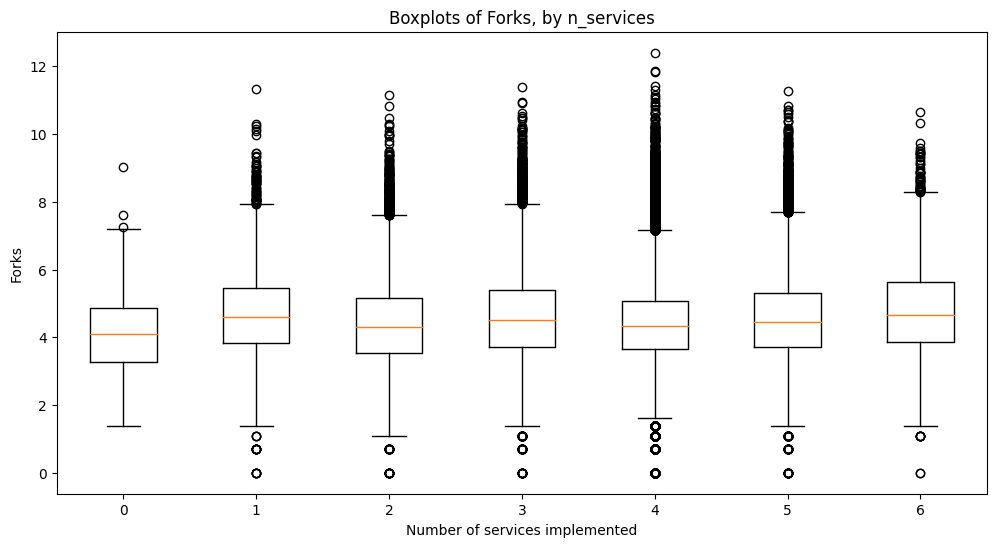

In [31]:
a = []
for i in range(7):
    a.append(np.log(df[df['Service_Count'] == i]['Forks'].to_numpy()))

plt.figure(figsize=(12,6))
plt.boxplot(a, labels=[0,1,2,3,4,5,6])
plt.xlabel('Number of services implemented')
plt.ylabel('Forks')
plt.title('Boxplots of Forks, by n_services')
plt.show()

We can see that there is not much difference in distribution for both Stars and Forks.

### Spearman rank correlation coefficient
- We do not use **Pearson** correlation coefficient because it assumes the values are continuous.
- We use **Spearman** correlation coefficient because `n_services` is actually a categorical feature.

In [32]:
services_stars_corr = stats.spearmanr(df['Service_Count'], df['Stars']).pvalue
services_forks_corr = stats.spearmanr(df['Service_Count'], df['Forks']).pvalue

print('Services and Stars correlation:', services_stars_corr)
print('Services and Forks correlation:', services_forks_corr)

Services and Stars correlation: 1.923154076037549e-11
Services and Forks correlation: 3.958520806974958e-11


These correlation coefficients are near zero.

**Conclusion:**  
- There is hardly any correlation between the number of services a repository implements and the number of stars/forks it recieves.  
- This means that repositories should not give much importance to implementing these services. 

## Q: Are git repositories more popular if they have a homepage?
- This question will help us know whether repositories should create an additional homepage for users to navigate to.
- **We'll answer this question by**
    - Seperate the dataset into two sets: repositories that have homepages and those that don't.
    - Perform t-test between the amount of stars/forks of the two sets.
    - Plot boxplots to observe the distribution.

### Create `Has_Homepage` column

In [33]:
df['Has_Homepage'] = ~df['Homepage'].isna()

### Perform ANOVA test on the data
- An ANOVA test between two datasets $A$ and $B$ proposes the **null hypothesis** that the population mean of the datasets are statistically expected to be equal.

In [34]:
stars_anovatest = stats.f_oneway(df[df['Has_Homepage'] == True]['Stars'], df[df['Has_Homepage'] == False]['Stars'], )
forks_anovatest = stats.f_oneway(df[df['Has_Homepage'] == True]['Forks'], df[df['Has_Homepage'] == False]['Forks'])

print('p-value of ANOVA test for Stars:', stars_anovatest.pvalue)
print('p-value of ANOVA test for Forks:', forks_anovatest.pvalue)

p-value of ANOVA test for Stars: 0.0
p-value of ANOVA test for Forks: 4.367229884044468e-143


The p-values are extremely small, so we can **reject the null hypothesis.**  
So, according to ANOVA test, the two data sets have **different** stars/forks mean.

### Plotting

C:\Users\khoan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Forks')

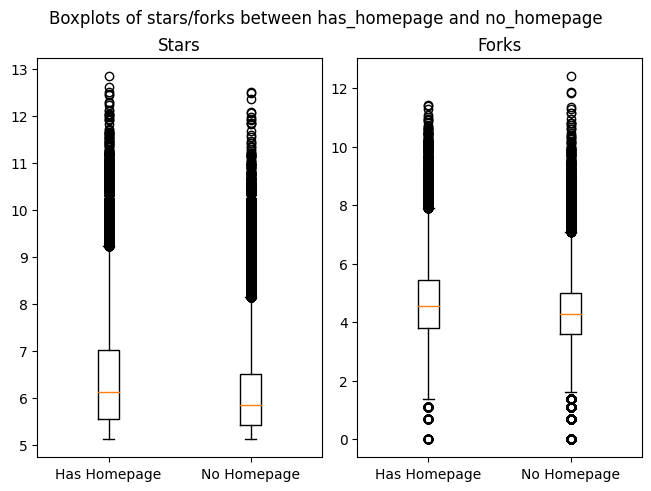

In [35]:
fig = plt.figure(layout='constrained')
fig.suptitle('Boxplots of stars/forks between has_homepage and no_homepage')
axs = fig.subplots(1,2)

axs[0].boxplot([np.log(df[df['Has_Homepage'] == True]['Stars']), np.log(df[df['Has_Homepage'] == False]['Stars'])], labels=['Has Homepage', 'No Homepage'])
axs[0].set_title('Stars')
axs[1].boxplot([np.log(df[df['Has_Homepage'] == True]['Forks']), np.log(df[df['Has_Homepage'] == False]['Forks'])], labels=['Has Homepage', 'No Homepage'])
axs[1].set_title('Forks')

**Conclusion:**
- From the boxplots and ANOVA tests, we can see that repositories with a homepage are likely to gain more stars and forks than repositories that don't have a homepage.
- This can be an incentive for repositories wanting to be popular to add a homepage.